In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_base/home_credit_default_risk_application_100000.csv')

In [3]:
#listando as colunas que serão utilizadas para correlação

selected_columns = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 #'NAME_TYPE_SUITE',
 #'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 #'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 #'DAYS_REGISTRATION',
 #'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 #'FLAG_MOBIL',
 #'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 #'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 #'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 #'REG_REGION_NOT_LIVE_REGION',
 #'REG_REGION_NOT_WORK_REGION',
 #'LIVE_REGION_NOT_WORK_REGION',
 #'REG_CITY_NOT_LIVE_CITY',
 #'REG_CITY_NOT_WORK_CITY',
 #'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
#  'EXT_SOURCE_1',
#  'EXT_SOURCE_2',
#  'EXT_SOURCE_3',
#  'APARTMENTS_AVG',
#  'BASEMENTAREA_AVG',
#  'YEARS_BEGINEXPLUATATION_AVG',
#  'YEARS_BUILD_AVG',
#  'COMMONAREA_AVG',
#  'ELEVATORS_AVG',
#  'ENTRANCES_AVG',
#  'FLOORSMAX_AVG',
#  'FLOORSMIN_AVG',
#  'LANDAREA_AVG',
#  'LIVINGAPARTMENTS_AVG',
#  'LIVINGAREA_AVG',
#  'NONLIVINGAPARTMENTS_AVG',
#  'NONLIVINGAREA_AVG',
#  'APARTMENTS_MODE',
#  'BASEMENTAREA_MODE',
#  'YEARS_BEGINEXPLUATATION_MODE',
#  'YEARS_BUILD_MODE',
#  'COMMONAREA_MODE',
#  'ELEVATORS_MODE',
#  'ENTRANCES_MODE',
#  'FLOORSMAX_MODE',
#  'FLOORSMIN_MODE',
#  'LANDAREA_MODE',
#  'LIVINGAPARTMENTS_MODE',
#  'LIVINGAREA_MODE',
#  'NONLIVINGAPARTMENTS_MODE',
#  'NONLIVINGAREA_MODE',
#  'APARTMENTS_MEDI',
#  'BASEMENTAREA_MEDI',
#  'YEARS_BEGINEXPLUATATION_MEDI',
#  'YEARS_BUILD_MEDI',
#  'COMMONAREA_MEDI',
#  'ELEVATORS_MEDI',
#  'ENTRANCES_MEDI',
#  'FLOORSMAX_MEDI',
#  'FLOORSMIN_MEDI',
#  'LANDAREA_MEDI',
#  'LIVINGAPARTMENTS_MEDI',
#  'LIVINGAREA_MEDI',
#  'NONLIVINGAPARTMENTS_MEDI',
#  'NONLIVINGAREA_MEDI',
#  'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 #'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
#  'OBS_30_CNT_SOCIAL_CIRCLE',
#  'DEF_30_CNT_SOCIAL_CIRCLE',
#  'OBS_60_CNT_SOCIAL_CIRCLE',
#  'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
#  'FLAG_DOCUMENT_2',
#  'FLAG_DOCUMENT_3',
#  'FLAG_DOCUMENT_4',
#  'FLAG_DOCUMENT_5',
#  'FLAG_DOCUMENT_6',
#  'FLAG_DOCUMENT_7',
#  'FLAG_DOCUMENT_8',
#  'FLAG_DOCUMENT_9',
#  'FLAG_DOCUMENT_10',
#  'FLAG_DOCUMENT_11',
#  'FLAG_DOCUMENT_12',
#  'FLAG_DOCUMENT_13',
#  'FLAG_DOCUMENT_14',
#  'FLAG_DOCUMENT_15',
#  'FLAG_DOCUMENT_16',
#  'FLAG_DOCUMENT_17',
#  'FLAG_DOCUMENT_18',
#  'FLAG_DOCUMENT_19',
#  'FLAG_DOCUMENT_20',
#  'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [4]:
df_risco_credito = df[selected_columns]

## 01) Qual é a idade, em anos, do titular mais jovem?

In [5]:
# Selecionando a coluna que representa a idade em dias
df_idade_cliente = df_risco_credito['DAYS_BIRTH']
df_idade_cliente

0        -9461
1       -16765
2       -19046
3       -19005
4       -19932
         ...  
99995   -11838
99996   -13429
99997   -17626
99998   -12420
99999   -14808
Name: DAYS_BIRTH, Length: 100000, dtype: int64

In [6]:
# transformando os dias em anos
df_risco_credito.loc[:,'DAYS_BIRTH'] = df_idade_cliente.apply(lambda x:(x/365)*-1)

In [12]:
# Colocando a idade em ordem crescente
df_idade_crescente = df_risco_credito['DAYS_BIRTH'].sort_values(ascending=True)
df_idade_crescente

53702    21.030137
73870    21.041096
48401    21.041096
19115    21.041096
65419    21.041096
           ...    
20863    68.991781
49288    68.997260
65237    69.002740
79852    69.027397
63316    69.043836
Name: DAYS_BIRTH, Length: 100000, dtype: float64

In [18]:
df_idade_mais_jovem = df_idade_crescente.round().unique()[0]
df_idade_mais_jovem

21.0

In [19]:
print(f'A idade do titular mais jovem é de {df_idade_mais_jovem:.0f} anos.')

A idade do titular mais jovem é de 21 anos.


<AxesSubplot:ylabel='Frequency'>

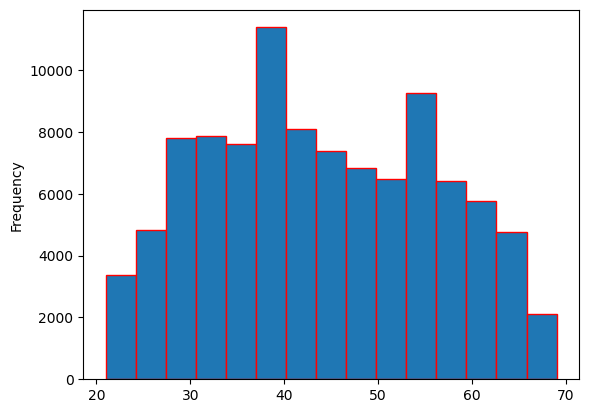

In [32]:
df_idade_crescente.round().plot(kind='hist',edgecolor="red",bins=15)

## 02) Qual a média do valor de anuidade dos residentes em apartamentos maiores de 50 anos?

In [33]:
# idade dos clientes
df_idade = df_risco_credito['DAYS_BIRTH']
df_idade

0        25.920548
1        45.931507
2        52.180822
3        52.068493
4        54.608219
           ...    
99995    32.432877
99996    36.791781
99997    48.290411
99998    34.027397
99999    40.569863
Name: DAYS_BIRTH, Length: 100000, dtype: float64

In [34]:
# clientas maiores de 50 anos
df_cliente_maior_50 = df_idade[df_idade > 50]
df_cliente_maior_50

2        52.180822
3        52.068493
4        54.608219
7        51.643836
8        55.065753
           ...    
99981    64.630137
99982    63.367123
99983    56.339726
99985    51.389041
99986    52.750685
Name: DAYS_BIRTH, Length: 33664, dtype: float64

In [35]:
# tipos de moradias
df_tipos_moradias = df_risco_credito['HOUSETYPE_MODE']
df_tipos_moradias

0        block of flats
1        block of flats
2                   NaN
3                   NaN
4                   NaN
              ...      
99995               NaN
99996    block of flats
99997    block of flats
99998    block of flats
99999               NaN
Name: HOUSETYPE_MODE, Length: 100000, dtype: object

In [36]:
# montante anuidade geral
df_montante_anuidade_geral = df_risco_credito['AMT_ANNUITY']
df_montante_anuidade_geral

0        24700.5
1        35698.5
2         6750.0
3        29686.5
4        21865.5
          ...   
99995    36459.0
99996    22599.0
99997    37044.0
99998     6579.0
99999    16875.0
Name: AMT_ANNUITY, Length: 100000, dtype: float64

In [37]:
# clientes residentes em apartamento
df_media_anuidade_residente_maior_50 = df_risco_credito.groupby((df_risco_credito['HOUSETYPE_MODE'] == 'block of flats') & (df_risco_credito['DAYS_BIRTH'] > 50))['AMT_ANNUITY'].mean()
df_media_anuidade_residente_maior_50

False    27041.659441
True     27300.605177
Name: AMT_ANNUITY, dtype: float64

In [38]:
print(f"A média do valor de anuidade dos residentes em apartamentos maiores de 50 anos é de R$ {df_media_anuidade_residente_maior_50[True]:.2f}")

A média do valor de anuidade dos residentes em apartamentos maiores de 50 anos é de R$ 27300.61


## 03) Existe uma correlação forte entre ter imóvel próprio e ter carro próprio? Por que?

In [39]:
# Mudando os valores da coluna para 1 onde for Y e 0 onde for N
df_risco_credito['FLAG_OWN_REALTY'] = df_risco_credito['FLAG_OWN_REALTY'].apply(lambda x:1 if x=="Y" else 0)
df_risco_credito['FLAG_OWN_REALTY'].astype(int)

0        1
1        0
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    0
99999    1
Name: FLAG_OWN_REALTY, Length: 100000, dtype: int32

In [40]:
# Mudando os valores da coluna para 1 onde for Y e 0 onde for N
df_risco_credito['FLAG_OWN_CAR'] = df_risco_credito['FLAG_OWN_CAR'].apply(lambda x:1 if x=="Y" else 0)
df_risco_credito['FLAG_OWN_CAR'].astype(int)

0        0
1        0
2        1
3        0
4        0
        ..
99995    0
99996    0
99997    1
99998    1
99999    1
Name: FLAG_OWN_CAR, Length: 100000, dtype: int32

In [41]:
# Verificando se há correlação entre ter imóvel próprio e carro próprio
df_risco_credito[['FLAG_OWN_REALTY','FLAG_OWN_CAR']].corr()

,FLAG_OWN_REALTY,FLAG_OWN_CAR
FLAG_OWN_REALTY,1.00000,0.00247
FLAG_OWN_CAR,0.00247,1.00000


## Resposta:
### <font color= 'blue'>Pelo valor obtido, demonstra ser uma <font color='red'>correlação fraca</font>. <font color='blue'>Dessa forma, não há como determinar precisamente a eficácia entre ter imóvel próprio e ter carro próprio.</font>